In [1]:
output_dir = "/home/sebastian/codes/data/quantum/embeddings"
import os
train_output_dir = os.path.join(output_dir, "train_embeddings")
test_output_dir = os.path.join(output_dir, "test_embeddings")
batch_size = 1

In [2]:
import os
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.models import efficientnet_b3
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset


class EmbeddingDataset(Dataset):
    def __init__(self, csv_file):
        self.data_frame = pd.read_csv(csv_file)
        self.embeddings = self.data_frame.iloc[:, :-1].values
        self.labels = self.data_frame['label'].values

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return embedding, label


train_embeddings_file = os.path.join(train_output_dir, "train_all_embeddings.csv")
test_embeddings_file = os.path.join(test_output_dir, "test_all_embeddings.csv")

train_dataset_loaded = EmbeddingDataset(train_embeddings_file)
test_dataset_loaded = EmbeddingDataset(test_embeddings_file)

train_dataloader_loaded = DataLoader(train_dataset_loaded, batch_size=batch_size, shuffle=True)
test_dataloader_loaded = DataLoader(test_dataset_loaded, batch_size=batch_size, shuffle=False)

for embeddings, labels in train_dataloader_loaded:
    print(f"Train Embeddings Shape: {embeddings.shape}, Labels: {labels}")
    break

for embeddings, labels in test_dataloader_loaded:
    print(f"Test Embeddings Shape: {embeddings.shape}, Labels: {labels}")
    break

Train Embeddings Shape: torch.Size([1, 512]), Labels: tensor([0])
Test Embeddings Shape: torch.Size([1, 512]), Labels: tensor([2])


In [3]:
len(train_dataloader_loaded), len(test_dataloader_loaded)

(60000, 10000)

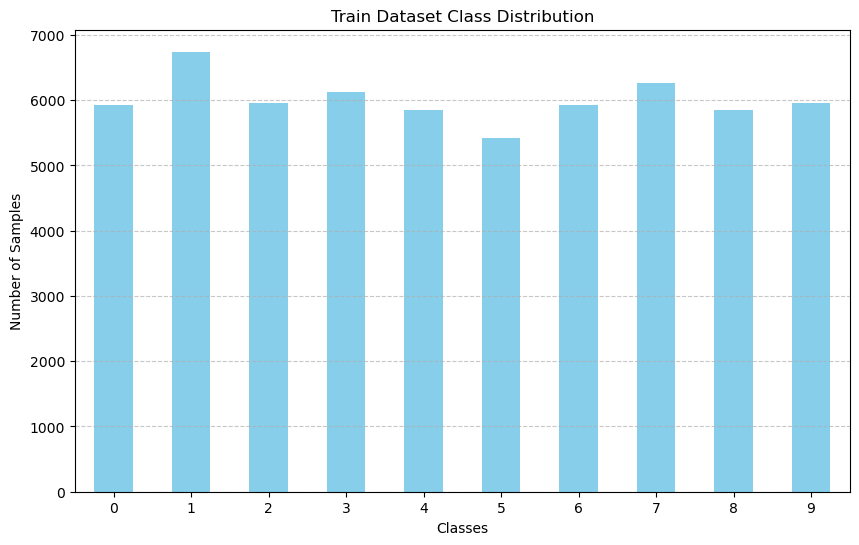

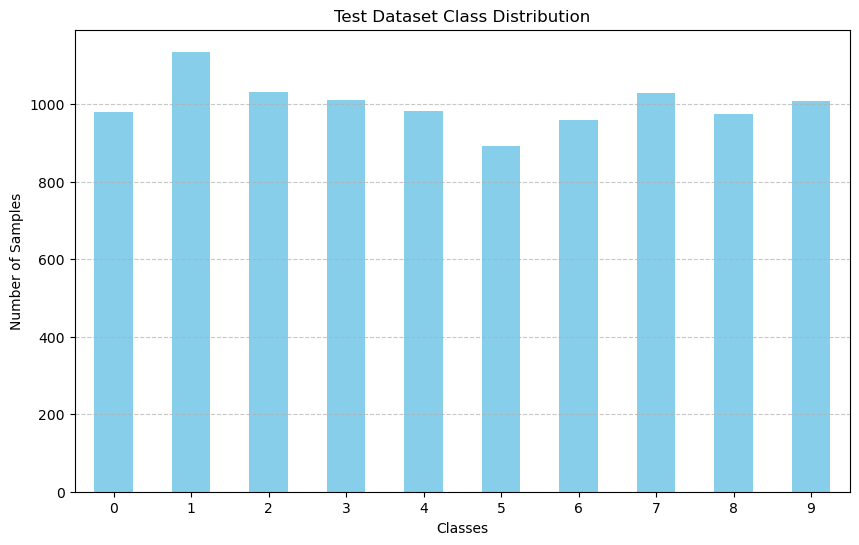

In [4]:
import matplotlib.pyplot as plt

def plot_class_distribution(dataset, title):
    label_counts = pd.Series(dataset.labels).value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    label_counts.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_class_distribution(train_dataset_loaded, "Train Dataset Class Distribution")
plot_class_distribution(test_dataset_loaded, "Test Dataset Class Distribution")